<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

Generate a random matrix that has more columns than rows (fat-matrix) and Gram Schmidt
orthogonalization on it, to generate an orthonormal matrix, and a representation of the original
matrix with the newly generated orthonormal matrix as a basis.

In [164]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
A = np.random.rand(5,10)
print(A)

[[0.95293805 0.76611859 0.87176814 0.02525811 0.97098821 0.2273109
  0.95020963 0.54339412 0.18559013 0.43879065]
 [0.27350808 0.44453771 0.70554585 0.43600426 0.10509817 0.81894628
  0.04125653 0.40348648 0.15429484 0.54152941]
 [0.3258228  0.97198588 0.07012522 0.65533652 0.69501953 0.70933546
  0.89580523 0.32821019 0.0054076  0.39954927]
 [0.27955788 0.46990935 0.81837659 0.3679767  0.47553041 0.28681562
  0.55957135 0.38670195 0.64454165 0.22764463]
 [0.21908434 0.92141593 0.21176396 0.8201628  0.68451328 0.17635234
  0.89351247 0.38438184 0.9822786  0.97800432]]


In [166]:
def normalize(u):
  return u/(np.linalg.norm(u))

def project(u,v):
  '''
    Both u and v are assumed to be column vectors
  '''
  projection = (np.dot(u.T,v)/np.dot(u.T,u))*u
  return projection
  

In [167]:
def gram_shmidt(A: np.ndarray):
  E = []
  U = []
  for i in range(A.shape[0]):
    v = A[i,:]
    w = v - np.sum(np.asarray([project(u , v) for u in U]),axis=0)
    U.append(w)
    E.append(normalize(w))

  U = np.asarray(U)
  E = np.asarray(E)

  return E

In [168]:
basis = gram_shmidt(A)
basis.shape

(5, 10)

In [169]:
repr = A @ basis.T
repr

array([[ 2.16224214e+00,  5.01208039e-16,  1.36522255e-16,
         4.66130259e-16, -2.81483862e-16],
       [ 9.43558787e-01,  1.11053816e+00, -3.42440301e-16,
        -4.91857857e-16, -3.22008330e-17],
       [ 1.46829007e+00,  4.60613417e-01,  1.08320212e+00,
         1.38447055e-16,  2.33626072e-16],
       [ 1.31225727e+00,  4.24756373e-01, -1.79793449e-02,
         6.63069393e-01, -2.08919404e-16],
       [ 1.61595639e+00,  4.87401697e-01,  7.80656732e-01,
         8.08753908e-01,  9.32346073e-01]])

In [170]:
np.mean(np.square(A - repr @ basis))

3.77207824082823e-32

# Question 2 & 3

Generate a stream of 96 random bits and transmit it at a bit rate of 5 mbps (million bits per second)
over a carrier frequency 50 MHz, and sampled at 500 MHz, examine the signal waveforms for
* BPSK
* QPSK
* 8-PSK
* 16-QAM
* 64-QAM.

Try to retrieve the transmitted bits from the modulated waveforms using a correlation receiver, since there is no additive noise, there should be no errors.

In [171]:
bitstream = np.random.randint(low = 0, high = 2, size = (96,))

print(bitstream.shape)
print(bitstream)

(96,)
[0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0]


In [172]:
# setting constants
transmission_rate = 5e6
f_c = 50e6
f_s = 500e6

## BPSK

In [173]:
num_symbs = 2
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

psk_out = np.zeros(int(samples_per_symb * len(bitstream)/bits_per_symb))

psk_theta = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]
print(psk_theta)

Time per Symbol: 2e-07s
Number of samples per symbol: 100
[0.0, 3.141592653589793]


In [174]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    psk_out[index] = np.cos(2*(np.pi)*f_c*t + psk_theta[m])

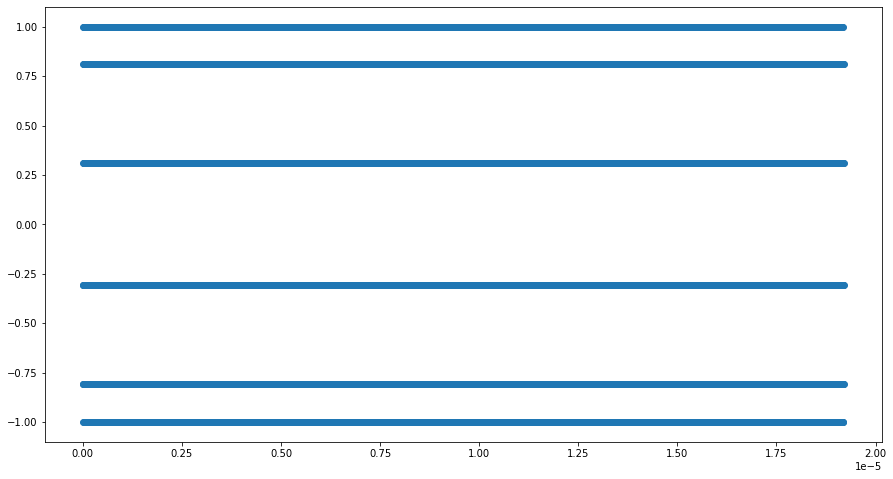

In [175]:
t = np.arange(0, len(psk_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, psk_out)
plt.show()

In [176]:
out = np.zeros_like(bitstream)

In [177]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = psk_out[int(samples_per_symb * (i/bits_per_symb)) : int(samples_per_symb * ((i/bits_per_symb)+1))]
  

  symbs = np.zeros((num_symbs, samples_per_symb))
  t = np.arange(int(samples_per_symb * (i/bits_per_symb)), int(samples_per_symb * ((i/bits_per_symb)+1)), 1) * (1/f_s)
  for k in range(num_symbs):
    symbs[k,:] =  np.cos(2 * np.pi * f_c * t + psk_theta[k])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)

  for j in range(bits_per_symb):
    out[i+j] = bits[j]  

In [178]:
out

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0])

In [179]:
print(f"MSE: {np.square(np.mean(bitstream - out))}")

MSE: 0.0


## QPSK

In [180]:
num_symbs = 4
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

psk_out = np.zeros(int(samples_per_symb * len(bitstream)/bits_per_symb))

psk_theta = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]
print(psk_theta)

Time per Symbol: 4e-07s
Number of samples per symbol: 200
[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]


In [181]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    psk_out[index] = np.cos(2*(np.pi)*f_c*t + psk_theta[m])

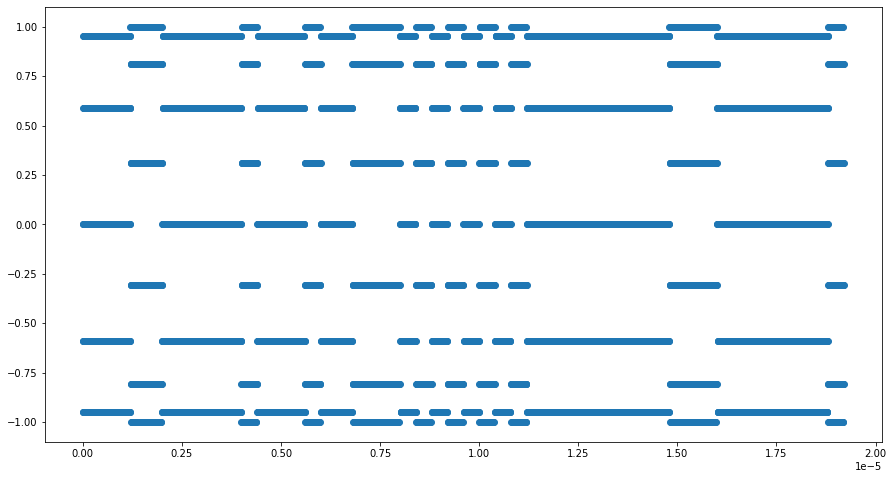

In [182]:
t = np.arange(0, len(psk_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, psk_out)
plt.show()

In [183]:
out = np.zeros_like(bitstream)

In [184]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = psk_out[int(samples_per_symb * (i/bits_per_symb)) : int(samples_per_symb * ((i/bits_per_symb)+1))]
  

  symbs = np.zeros((num_symbs, samples_per_symb))
  t = np.arange(int(samples_per_symb * (i/bits_per_symb)), int(samples_per_symb * ((i/bits_per_symb)+1)), 1) * (1/f_s)
  for k in range(num_symbs):
    symbs[k,:] =  np.cos(2 * np.pi * f_c * t + psk_theta[k])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)

  for j in range(bits_per_symb):
    out[i+j] = bits[j]  

In [185]:
out

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0])

In [186]:
print(f"MSE: {np.square(np.mean(bitstream - out))}")

MSE: 0.0


## 8-PSK

In [187]:
num_symbs = 8
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

psk_out = np.zeros(int(samples_per_symb * len(bitstream)/bits_per_symb))

psk_theta = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]
print(psk_theta)

Time per Symbol: 6e-07s
Number of samples per symbol: 300
[0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138]


In [188]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    psk_out[index] = np.cos(2*(np.pi)*f_c*t + psk_theta[m])

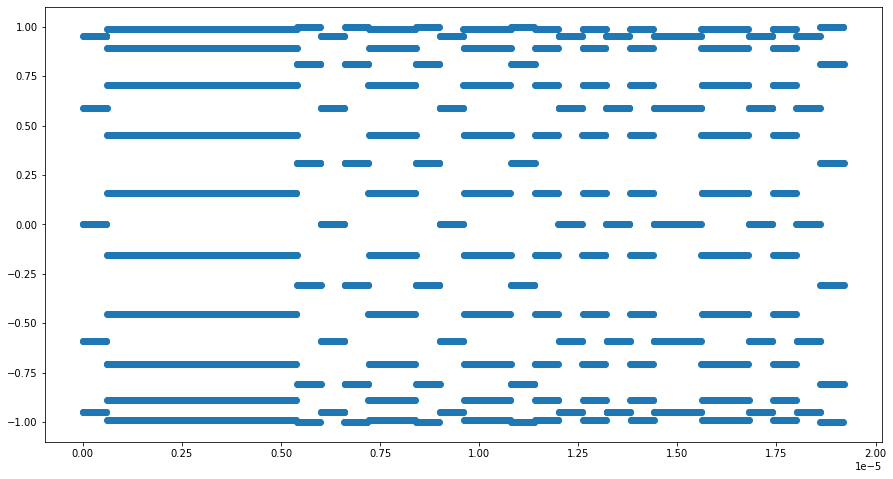

In [189]:
t = np.arange(0, len(psk_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, psk_out)
plt.show()

In [190]:
out = np.zeros_like(bitstream)

In [191]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = psk_out[int(samples_per_symb * (i/bits_per_symb)) : int(samples_per_symb * ((i/bits_per_symb)+1))]
  

  symbs = np.zeros((num_symbs, samples_per_symb))
  t = np.arange(int(samples_per_symb * (i/bits_per_symb)), int(samples_per_symb * ((i/bits_per_symb)+1)), 1) * (1/f_s)
  for k in range(num_symbs):
    symbs[k,:] =  np.cos(2 * np.pi * f_c * t + psk_theta[k])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)

  for j in range(bits_per_symb):
    out[i+j] = bits[j]  

In [192]:
out

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0])

In [193]:
print(f"MSE: {np.square(np.mean(bitstream - out))}")

MSE: 0.0


# 16 QAM

In [194]:
num_symbs = 16
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

# for square QAM
x_pts = np.int32(np.round(np.sqrt(num_symbs)))
y_pts = np.int32(np.round(np.sqrt(num_symbs)))

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

print(f"Ami: {Ami}")
print(f"Amq: {Amq}")

qam_out = np.zeros((np.int32(samples_per_symb * (len(bitstream)/bits_per_symb)),))

Time per Symbol: 8e-07s
Number of samples per symbol: 400
Ami: [-3 -1  1  3]
Amq: [-3 -1  1  3]


In [195]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    angle = 2*np.pi*f_c*t

    m_real = m // x_pts
    m_img = m % y_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    qam_out[index] = (A * np.exp(np.complex(0,angle))).real

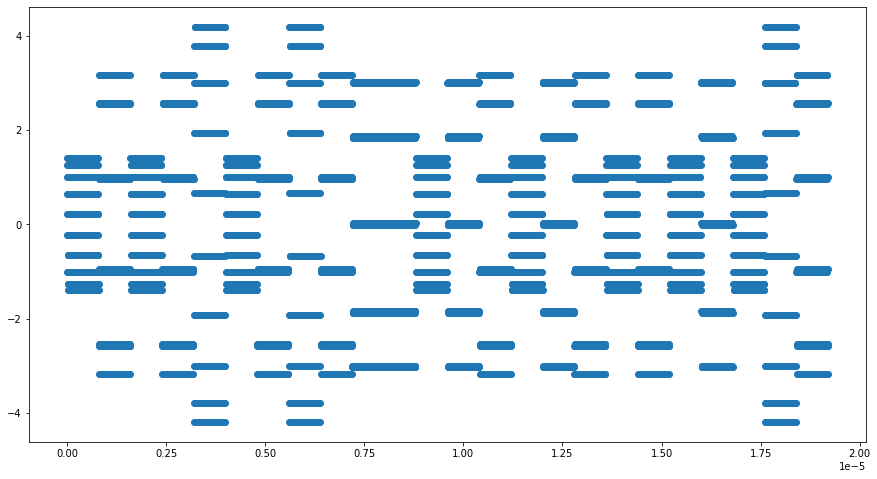

In [196]:
t = np.arange(0, len(qam_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, qam_out)
plt.show()

In [197]:
out = np.zeros_like(bitstream)

In [198]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = qam_out[int((i/bits_per_symb)*samples_per_symb):int((i/bits_per_symb)*samples_per_symb) + samples_per_symb]

  symbs = np.zeros((num_symbs, samples_per_symb))

  t = np.arange(samples_per_symb * i, samples_per_symb * (i+1), 1) * (1/f_s)

  for j in range(num_symbs):
    m_real = j // x_pts
    m_img = j % y_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    angle = 2*np.pi*f_c*t
    symbs[j,:] = np.asarray([ (A * np.exp(np.complex(0, 2*np.pi*f_c*ti))).real for ti in t  ])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)
  out[i:i+bits_per_symb] = [(1 if bits[k]=='1' else 0) for k in range(bits_per_symb)]

In [199]:
out

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0])

In [200]:
print(f"MSE: {np.square(np.mean(bitstream - out)): .4f}")

MSE:  0.0183


# 64 QAM

In [201]:
num_symbs = 64
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

# for square QAM
x_pts = np.int32(np.round(np.sqrt(num_symbs)))
y_pts = np.int32(np.round(np.sqrt(num_symbs)))

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

print(f"Ami: {Ami}")
print(f"Amq: {Amq}")

qam_out = np.zeros((np.int32(samples_per_symb * (len(bitstream)/bits_per_symb)),))

Time per Symbol: 1.2e-06s
Number of samples per symbol: 600
Ami: [-7 -5 -3 -1  1  3  5  7]
Amq: [-7 -5 -3 -1  1  3  5  7]


In [202]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    angle = 2*np.pi*f_c*t

    m_real = m // x_pts
    m_img = m % y_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    qam_out[index] = (A * np.exp(np.complex(0,angle))).real

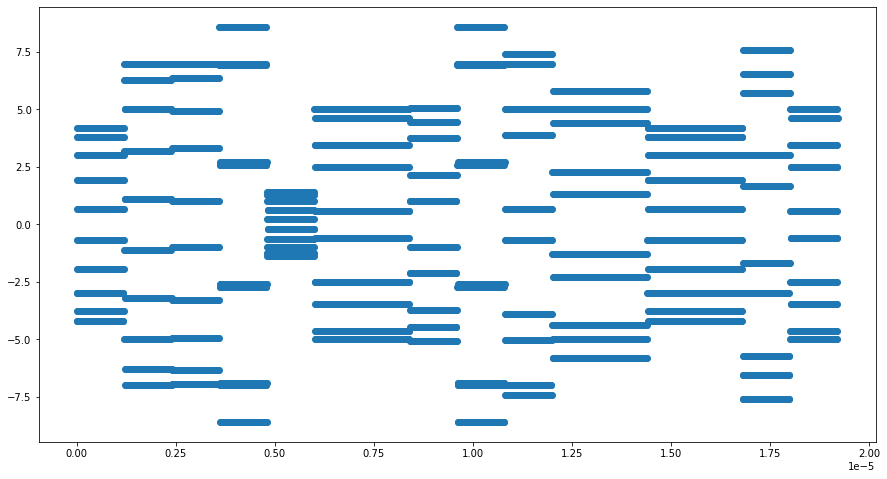

In [203]:
t = np.arange(0, len(qam_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, qam_out)
plt.show()

In [204]:
out = np.zeros_like(bitstream)

In [205]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = qam_out[int((i/bits_per_symb)*samples_per_symb):int((i/bits_per_symb)*samples_per_symb) + samples_per_symb]

  symbs = np.zeros((num_symbs, samples_per_symb))

  t = np.arange(samples_per_symb * i, samples_per_symb * (i+1), 1) * (1/f_s)

  for j in range(num_symbs):
    m_real = j // x_pts
    m_img = j % y_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    angle = 2*np.pi*f_c*t
    symbs[j,:] = np.asarray([ (A * np.exp(np.complex(0, 2*np.pi*f_c*ti))).real for ti in t  ])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)
  out[i:i+bits_per_symb] = [(1 if bits[k]=='1' else 0) for k in range(bits_per_symb)]

In [206]:
out

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [207]:
print(f"MSE: {np.square(np.mean(bitstream - out)): .4f}")

MSE:  0.0017
